# Victorian Housing Price Analysis

In [17]:
#%matplotlib qt
#uncomment to make 3d plot interactive
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
#loading dataset from Kaggle
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0


In [3]:
#data cleaning - removing all Nan price rows
df=df.dropna(subset=['Price'])
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0


In [4]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)
#converting Date column to displaye YYYY-MM-DD
df

C:\Users\S550C\Miniconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-05-07,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-10-08,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-10-08,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0


In [6]:
suburb_price=df.groupby('Suburb').Price.median().reset_index()
#find median price of suburbs
suburb_price=suburb_price.sort_values('Price', ascending=False).reset_index()
suburb_price=suburb_price.head(10)
#sort highest to lowest and save top ten
suburb_price

,index,Suburb,Price
0,62,Canterbury,2300000.0
1,203,Malvern,1995000.0
2,215,Middle Park,1880000.0
3,60,Camberwell,1835000.0
4,21,Balwyn,1810000.0
5,4,Albert Park,1810000.0
6,42,Brighton,1800000.0
7,185,Kew East,1754500.0
8,102,Deepdene,1750000.0
9,174,Ivanhoe East,1745000.0


C:\Users\S550C\Miniconda2\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


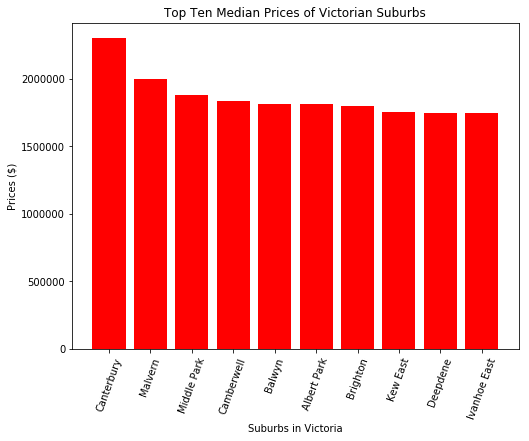

In [7]:
plt.figure(figsize=(8,6))
plt.xlabel('Suburbs in Victoria')
plt.ylabel('Prices ($)')
plt.title('Top Ten Median Prices of Victorian Suburbs')
x = suburb_price['Suburb']
y = suburb_price['Price']
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y, color='red')
ax=plt.subplot()
ax.set_xticks(np.arange(len(suburb_price['Suburb'])))
ax.set_xticklabels(suburb_price['Suburb'], rotation=70)
plt.show()

C:\Users\S550C\Miniconda2\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


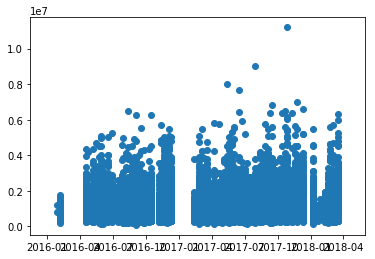

In [8]:
plt.scatter(df['Date'],df['Price'])
plt.show()

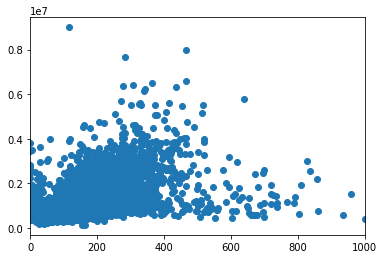

In [9]:
plt.scatter(df['BuildingArea'],df['Price'])
ax1=plt.subplot()
ax1.set_xlim(0, 1000)
#set limit of 1000 to remove outliers
plt.show()

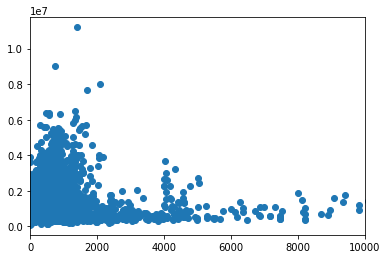

In [10]:
plt.scatter(df['Landsize'],df['Price'])
ax2=plt.subplot()
ax2.set_xlim(0, 10000)
#set limit of 10,000 to remove outliers
plt.show()

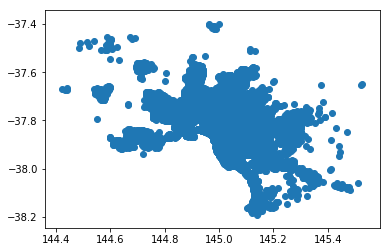

array(['h', 't', 'u'], dtype=object)

In [11]:
plt.scatter(df['Longtitude'],df['Lattitude'])
plt.show()
#can show over years, or 3d with height as price
df['Regionname'].unique()
df['Type'].unique()

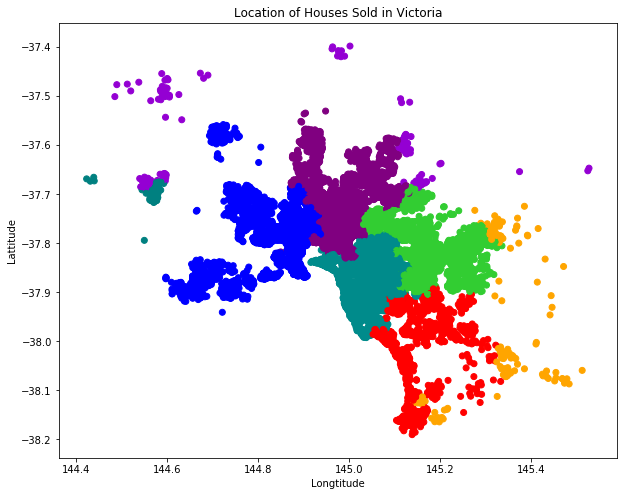

In [12]:
regiondf=df.dropna(subset=['Regionname'])
colors = {'Northern Metropolitan':'purple', 'Western Metropolitan':'blue', 'Southern Metropolitan':'darkcyan', 'Eastern Metropolitan':'limegreen','South-Eastern Metropolitan':'red', 'Eastern Victoria':'orange', 'Northern Victoria':'darkviolet', 'Western Victoria':'teal', 'nan':'black'}
#color cooding by region name
plt.figure(figsize=(10,8))
plt.xlabel('Longtitude')
plt.ylabel('Lattitude')
plt.title('Location of Houses Sold in Victoria')
plt.scatter(regiondf['Longtitude'], regiondf['Lattitude'], c=regiondf['Regionname'].apply(lambda x: colors[x]))

plt.show()

In [13]:
#3d plot

In [14]:
lowest_suburb_price=df.groupby('Suburb').Price.median().reset_index()
#find median price of suburbs
lowest_suburb_price=lowest_suburb_price.sort_values('Price', ascending=True).reset_index()
#sort by lowest
lowest_suburb_price=lowest_suburb_price.head(10)
#select ten lowest median suburb house prices
lowest_suburb_price=lowest_suburb_price.sort_values('Price', ascending=False).reset_index()
#sort by highest to lowest of bottom ten to show prices descending
lowest_suburb_price

,level_0,index,Suburb,Price
0,9,331,Whittlesea,472500.0
1,8,107,Diggers Rest,460000.0
2,7,87,Coolaroo,458500.0
3,6,90,Cranbourne East,440000.0
4,5,19,Bacchus Marsh,431000.0
5,4,211,Melton West,426000.0
6,3,209,Melton,409000.0
7,2,210,Melton South,408500.0
8,1,101,Darley,380000.0
9,0,193,Kurunjang,375000.0


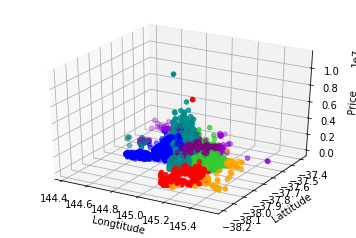

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =regiondf['Longtitude']
y =regiondf['Lattitude']
z =regiondf['Price']
colors = {'Northern Metropolitan':'purple', 'Western Metropolitan':'blue', 'Southern Metropolitan':'darkcyan', 'Eastern Metropolitan':'limegreen','South-Eastern Metropolitan':'red', 'Eastern Victoria':'orange', 'Northern Victoria':'darkviolet', 'Western Victoria':'teal', 'nan':'black'}
#color cooding by region name
ax.scatter(x, y, z, c=regiondf['Regionname'].apply(lambda x: colors[x]), marker='o')

ax.set_xlabel('Longtitude')
ax.set_ylabel('Lattitude')
ax.set_zlabel('Price')
plt.show()

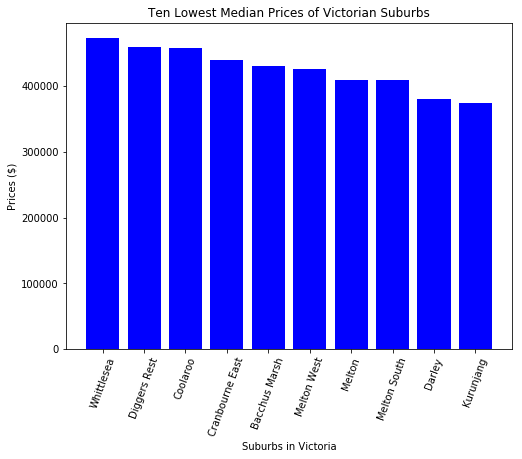

In [16]:
plt.figure(figsize=(8,6))
plt.xlabel('Suburbs in Victoria')
plt.ylabel('Prices ($)')
plt.title('Ten Lowest Median Prices of Victorian Suburbs')
x = lowest_suburb_price['Suburb']
y = lowest_suburb_price['Price']
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y, color='blue')
ax=plt.subplot()
ax.set_xticks(np.arange(len(lowest_suburb_price['Suburb'])))
ax.set_xticklabels(lowest_suburb_price['Suburb'], rotation=70)
plt.show()

In [20]:
#pair wise plot
#sns.pairplot(df)

In [27]:
#Linear Regression
from sklearn import datasets, linear_model
df=df.dropna(subset=['Date'])
#drop all
dates_X = df[:, np.newaxis, 2]

line_fitter = linear_model.LinearRegression()
line_fitter.fit(df['Date'],df['Price'])
new_dates=['2018-08-13','2018-09-14','2018-10-15','2018-11-16','2018-12-17','2019-10-18']
y_predicted_price=line_fitter.predict(new_dates)
plt.plot(new_dates,y_predicted_price)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=['2016-12-03T00:00:00.000000000' '2016-02-04T00:00:00.000000000'
 '2017-03-04T00:00:00.000000000' ... '2018-02-24T00:00:00.000000000'
 '2018-02-24T00:00:00.000000000' '2018-02-24T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.